The objective of this guided project is to demonstrate the data cleaning techniques.
We will be using the exit surveys from employees of the <em>Department of Education Training and Employment (DETE)</em> and the <em>Technical and Further Education (TAFE) instute </em> in Queensland, Australia. <br>

We will answer the question: <br> 
<ul>
<li> <em>Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? </em> </li>
    <li> <em>What about employees who have been at the job longer? </em> </li>
</ul>

To achieve this we will: <br>
1. Cleanup and combine the two datasets
2. Define and categorize how long the employee was with the institute
3. Identify the resignations caused by some kind of dissatisfaction
4. Analyze the data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline


In [2]:
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated','-'], keep_default_na=True)
tafe_survey = pd.read_csv('tafe_survey.csv', na_values=['Not Stated','-'], keep_default_na=True)

<div style="color:gray">
    <h3>I. Cleanup and combine the two datasets </h3>
    </div>

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
def plot_percentage_null_df(df):
    
    df_ = df.copy() #create a copy of the dataframe
    abv_cols_tafe = df_.columns.str.slice(start=-10)
    df_.columns = abv_cols_tafe
    df_null = df_.isnull().mean() * 100
    plt.figure(figsize=(10,3))

    df_null.plot(kind='bar', color='skyblue')
    plt.title('Percentage of Null Values for each column')
    plt.ylabel('Percentage of Null Values')
    plt.xlabel('Columns')
    plt.show()

In [6]:
tafe_columns_length = len(tafe_survey.columns)
dete_columns_length = len(dete_survey.columns)
print(tafe_columns_length)
print(dete_columns_length)

72
56


In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


<p style="color:gray">The two surveys differ in column naming. There are several similar data but named differently. Missing data are present. The tafe_survey data is more detailed. It includes the questions that they asked the employees on their exit interview.</p>

In [8]:
# Inspect the columns 28 to 49
dete_survey[dete_survey.columns[28:49]].head()

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M


In [9]:
# Inspect the columns 10 to 21
dete_survey[dete_survey.columns[10:21]].head()

,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family
0,True,False,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Inspect a column
tafe_survey["InstituteViews. Topic:6. The organisation recognised when staff did good work"].head()

0             Agree
1    Strongly Agree
2             Agree
3             Agree
4    Strongly Agree
Name: InstituteViews. Topic:6. The organisation recognised when staff did good work, dtype: object

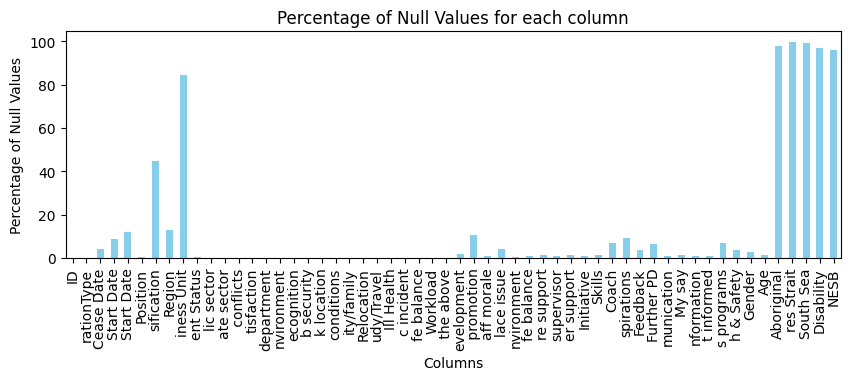

In [11]:
plot_percentage_null_df(dete_survey)

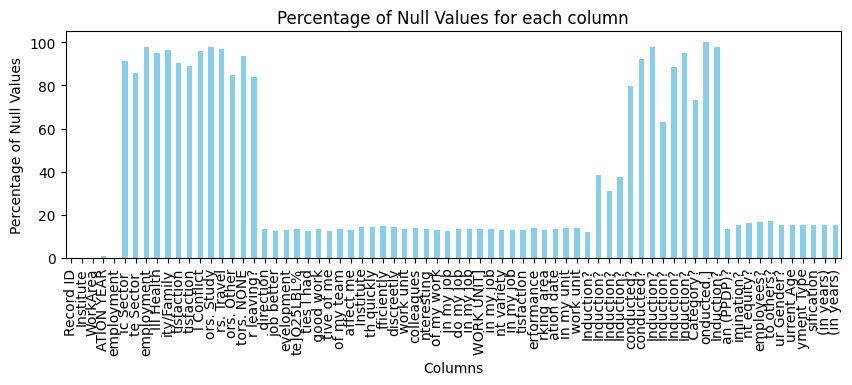

In [12]:
plot_percentage_null_df(tafe_survey)

<span style="color:gray">We see that some columns contain above 90% missing values. Consider the percentage of missing values in deciding which columns to drop. </span>

In [13]:
# Remove columns that will not be included in the data exploration
"""
Remove the columns that contain the questionaire during the survey conducted like:
    how the employee rated 'Staff morale' from A to F or 
    how do The organisation recognised when staff did good work
"""

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)



CLEANING COLUMN NAMES

<span style="color:gray">Some columns refer to the same data but were just named differently</span>

In [14]:
dete_tafe_def_common = {
    'date_survey': [
        'ID',
        'SeparationType', 
        'Cease Date', 
        'DETE Start Date', 
        " ", 
        'Age', 
        'Gender'],
    'tafe_survey':[
        'Record ID',
        'Reason for ceasing employment',
        "CESSATION YEAR", 
        " ", 
        "LengthOfServiceOverall. Overall Lenght of Service at Institute (in yearrs)",
        "CurrentAge.CurrentAge", 
        "Gender.What is your Gender?"],
    "Definition": [
        "An id used to identify the participant of the survey",
        "The reason why the participant's employment ended",
        "The year or month the participant's employment ended",
        "The year the participant began employment with the DETE",
        "The length of the person's employment (in years)",
        "The age of the participant",
        "The gender of the participant"
    ]
        }
    
df_dete_tafe_common = pd.DataFrame(dete_tafe_def_common)
df_dete_tafe_common

,date_survey,tafe_survey,Definition
0,ID,Record ID,An id used to identify the participant of the ...
1,SeparationType,Reason for ceasing employment,The reason why the participant's employment ended
2,Cease Date,CESSATION YEAR,The year or month the participant's employment...
3,DETE Start Date,,The year the participant began employment with...
4,,LengthOfServiceOverall. Overall Lenght of Serv...,The length of the person's employment (in years)
5,Age,CurrentAge.CurrentAge,The age of the participant
6,Gender,Gender.What is your Gender?,The gender of the participant


<ol style="color:gray">
    <li>Format the column names of dete_survey by converting to lowercase, removing trailing white spaces and replacing white spaces to underscore
<li>Rename some columns in tafe_survey_updated to prepare for combining the two dataframes
    </ol>

In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(" ","_").str.lower()

In [16]:
tafe_name_update_dict = {
    'Record ID':'id',
    'CESSATION YEAR':'cease_date',
    'Reason for ceasing employment':'separationtype',
    'Gender. What is your Gender?':'gender',
    'CurrentAge. Current Age':'age',
    'Employment Type. Employment Type':'employment_status',
    'Classification. Classification':'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'
}
tafe_survey_updated.rename(columns=tafe_name_update_dict, inplace=True)

<span style="color:gray">Check the columns to see if the changes were reflected.</span>

In [17]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [18]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

FILTER THE DATA

<div style="color:gray">
Let's inspect the separationtype column for both dete and tafe surveys.
In the tafe survey one of the values is Resignation while dete survey has three types of resignation. These are: 
<ol> 
    <li>Resignation-Other reasons</li>
    <li>Resignation-Other employer</li>
    <li>Resignation-Move overseas/interstate</li>
 </ol>
 </div>

In [19]:
print("---DETE-----------------------------")
print(dete_survey_updated['separationtype'].value_counts())
print("---TAFE-----------------------------")
print(tafe_survey_updated['separationtype'].value_counts())

---DETE-----------------------------
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
---TAFE-----------------------------
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


<div style="color:gray">
    Get the rows that contains the value "resignation" in it. Later on we will generalize all data that has resignation as "resignation".
    </div>

In [20]:
dete_resignations_boolean_series = dete_survey_updated['separationtype'].str.lower().str.contains('resignation')
dete_resignations = dete_survey_updated[dete_resignations_boolean_series].copy()

In [21]:
'''
There is a nan value in the separationtype column. This will cause the dataframe slicing to fail so let't address that first.
Find the index of the separationtype column containing the nan value and then drop it.
'''
# Find the index of the separationtype column containing nan value.
index_of_nan = tafe_survey_updated['separationtype'].index[tafe_survey_updated['separationtype'].isna()]
tafe_survey_updated['separationtype'][index_of_nan]
tafe_survey_updated.drop(index_of_nan, inplace=True)

tafe_resignations_boolean_series = tafe_survey_updated['separationtype'].str.lower().str.contains('resignation')
tafe_resignations = tafe_survey_updated[tafe_resignations_boolean_series].copy()

VERIFY THE DATA

In [22]:
cease_year_dete = dete_resignations["cease_date"].str.extractall(r'(?P<cease_year>\b\d{4}\b)').astype(int) #r'(\b\d{4}\b)'

first_index_dete = cease_year_dete.index.get_level_values(0)
cease_year_dete.set_index(first_index_dete, inplace=True)

# Add cease year as a new column to dete_resignations
dete_resignations['cease_year'] = cease_year_dete["cease_year"]

In [23]:
tafe_resignations["cease_date"] = tafe_resignations["cease_date"].astype(str)
cease_year_tafe = tafe_resignations["cease_date"].str.extractall(r'(?P<cease_year>\b\d{4}\b)').astype(int)
first_index_tafe = cease_year_tafe.index.get_level_values(0)
cease_year_tafe.set_index(first_index_tafe, inplace=True)

# Add cease year as a new column to tafe_resignations
tafe_resignations['cease_year'] = cease_year_tafe["cease_year"]

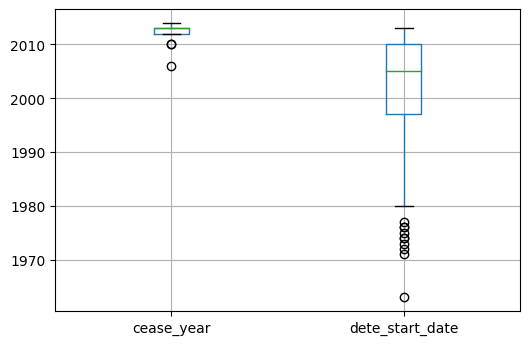

In [24]:
dete_resignations.boxplot(column=['cease_year','dete_start_date'])

In [25]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'cease_year'],
      dtype='object')

<div style="color:gray">
    <h3>II. Define and categorize how long the employee was with the institute</h3>
    </div>

<div style="color:gray">
    Create a new column called institute_service in dete_resignations. This is the length of service for the employee. It is calculated by taking the difference between the year they started in the institute and the year they stopped.
    <br>
  <div >
        e.g. <em>dete_resignations['cease_year'] - dete_resignations['dete_start_year']</em>
    </div>
 </div>

In [26]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']

In [27]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

<div style="color:gray">   <p> Change the value format of the institute_service to 
    the following range to match the same formatting with the tafe_resignations dataset. </p>
    <ul>
        <li>   'Less than 1 year'</li>
         <li>'1-2'</li>
         <li>'3-4'</li>
         <li>'5-6'</li>
         <li>'7-10'</li>
         <li>'11-20'</li>
         <li>'More than 20 years'</li>
    </ul>
    To do this, use the classify_service_years function in the dete_resignations['institute_service'].apply method
</div>

In [28]:
# dete_resignations['institute_service'].apply()
def classify_service_years(years):
    if years < 1:
        return 'Less than 1 year'
    elif years >= 1 and years < 3:
        return '1-2'
    elif years >= 3 and years < 5:
        return '3-4'
    elif years >=5 and years < 7:
        return '5-6'
    elif years >=7 and years < 11:
        return '7-10'
    elif years >=11 and years <= 20:    
        return '11-20'
    elif years > 20:
        return 'More than 20 years'
    else:
        return np.nan

In [29]:
dete_resignations['institute_service'] = dete_resignations['institute_service'].apply(classify_service_years)

<div style="color:gray">
    Recheck the institute_service columns for both dete_resignations and tafe_resignations dataframes.
    </div>

In [30]:
dete_resignations['institute_service'].value_counts()

11-20                 57
More than 20 years    43
7-10                  41
5-6                   40
1-2                   36
3-4                   36
Less than 1 year      20
Name: institute_service, dtype: int64

In [31]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64



<div style="color:gray">
    <h3>III. Identify the resignations caused by some kind of dissatisfaction </h3>
    </div>

Identify dissatisfied employees

In [32]:
tafe_resignations[['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Contributing Factors. Dissatisfaction      55 non-null     object
 1   Contributing Factors. Job Dissatisfaction  62 non-null     object
dtypes: object(2)
memory usage: 8.0+ KB


In [33]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif type(val) == str and "contributing" not in val.lower():
        return False
    else:
        return True
    
def update_vals_bool(val):
    if pd.isnull(val):
        return np.nan
    elif val > 0:
        return True
    else:
        return False
        

In [34]:
contrib_factors_columns_tafe = ['Contributing Factors. Dissatisfaction', 
                                'Contributing Factors. Job Dissatisfaction']
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up["dissatisfied"] = tafe_resignations_up[contrib_factors_columns_tafe].applymap(
    update_vals).sum(
    axis=1).apply(
    update_vals_bool)





In [35]:
tafe_resignations_up['dissatisfied'].value_counts()

False    285
True      55
Name: dissatisfied, dtype: int64

Work on dete_survey.

<br>
Identify the columns the tell the points of job dissatisfaction
<ul>
    <li>job_dissatisfaction</li>
    <li> dissatisfaction_with_the_department'</li>
    <li> lack_of_job_security</li>
    <li>lack_of_recognition</li>
    <li>work_location</li>
    <li>employment_conditions</li>
    <li>work_life_balance</li>
    <li>workload</li>
    <li>physical_work_environment</li>
</ul>
If any of these columns has a value of True then we'll mark the employee as dissatisfied.
<br>
Place this data in a new 'dissatisfied' column.

In [36]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'cease_year', 'institute_service'],
      dtype='object')

In [37]:
job_dissatisfaction_columns = ['job_dissatisfaction',
                     'dissatisfaction_with_the_department',
                     'lack_of_job_security',
                     'lack_of_recognition',
                     'work_location',
                     'employment_conditions',
                     'work_life_balance',
                     'workload',
                     'physical_work_environment']


dete_resignations_up = dete_resignations.copy()
dete_resignations_up["dissatisfied"] = dete_resignations_up[job_dissatisfaction_columns].applymap(
    update_vals_bool).sum(
    axis=1).apply(lambda x: x!=0)

In [38]:
# Check if the value for the "dissatisfied" column is correct by inspecting the columns related to job dissatisfaction
dete_resignations_up[[*job_dissatisfaction_columns,"dissatisfied"]].head()

,job_dissatisfaction,dissatisfaction_with_the_department,lack_of_job_security,lack_of_recognition,work_location,employment_conditions,work_life_balance,workload,physical_work_environment,dissatisfied
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False


In [39]:
# Inspect the dete_resignations_up table
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_year,institute_service,dissatisfied
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,2012.0,7-10,False
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,2012.0,11-20,True
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3-4,False
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,2012.0,11-20,True
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,3-4,False


In [40]:
# Inspect the tafe_resignations_up table
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,cease_year,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,NaN,...,NaN,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,2010.0,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,Other,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,2010.0,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,NaN,Career Move - Private Sector,NaN,NaN,Maternity/Family,...,Other,NaN,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,2010.0,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,...,Other,NaN,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,2010.0,False


Let's add a column called <em>institute</em> to both tables to allow us to distinguish between the two when they are merged.

In [41]:
tafe_resignations_up["institute"] = "TAFE"
dete_resignations_up["institute"] = "DETE"

Combine the two tables using the following columns: 

<br>
id<br>
cease_date<br>
separationtype<br>
gender<br>
age<br>
employment_status<br>
position<br>
institute_service<br>
cease_year<br>
dissatisfied<br>
institute<br>
<br>
These columns contain the information that we need to answer our query:
<br>
<em>Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?<br> What about employees who have been at the job longer? </em>


In [42]:
# Get the column names that are available in both the updated tafe and dete tables
resignation_cols = []
for col in tafe_resignations_up.columns:
    if col in dete_resignations_up.columns:
        resignation_cols.append(col)
        
# Combine the two tables
combined = pd.concat([
    tafe_resignations_up[resignation_cols],
    dete_resignations_up[resignation_cols]], 
                    ).reset_index().drop('index', axis=1)

combined_updated = combined.dropna(thresh=500, axis=1)        

In [43]:
# Inspect the institute_service column
combined_updated["institute_service"].value_counts()

1-2                   100
3-4                    99
Less than 1 year       93
11-20                  83
5-6                    73
7-10                   62
More than 20 years     53
Name: institute_service, dtype: int64

Categorize the institute service column into New, Experienced, Established and Veteran:

<ul>
    <li>New: Less than 3 years at a company</li>
    <li>Experienced: 3-6 years at a company</li>
    <li>Established: 7-10 years at a company</li>
    <li>Veteran: 11 or more years at a company</li>
</ul>

In [44]:
def categorize_service(val):
    if pd.isnull(val):
        return np.nan
    
    mapper = {"1-2":"New",
              "3-4":"Experienced", 
              "Less than 1 year":"New",
              "11-20":"Veteran",
              "5-6":"Experienced",
              "7-10":"Established",
              "More than 20 years":"Veteran"}
    return mapper[val]

<div style="color:gray">
    <h3>IV. Analyze the data </h3>
    </div>

In [45]:
combined_updated["Service_cat"] = combined_updated["institute_service"].apply(lambda x: categorize_service(x))
combined_updated.groupby('Service_cat').count()['dissatisfied'] # Count the number of respondents in each category.

Service_cat
Established     62
Experienced    172
New            193
Veteran        136
Name: dissatisfied, dtype: int64

In [46]:
# Count the number of respondents that resigned due to dissatisfaction per category
combined_updated.groupby('Service_cat').sum()['dissatisfied'][['New','Experienced','Established','Veteran']]

Service_cat
New            37.0
Experienced    50.0
Established    28.0
Veteran        65.0
Name: dissatisfied, dtype: float64

In [47]:
percent_of_sevice_dissat = combined_updated.groupby('Service_cat').mean()['dissatisfied'] # Get the percentage
percent_of_sevice_dissat

Service_cat
Established    0.451613
Experienced    0.290698
New            0.191710
Veteran        0.477941
Name: dissatisfied, dtype: float64

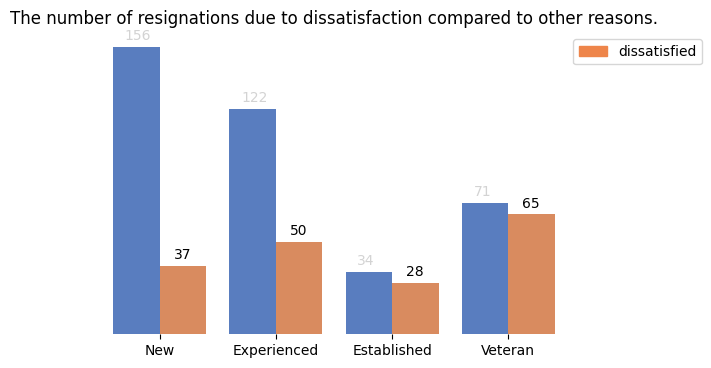

In [48]:
grouped_count_agg = combined_updated.groupby(['Service_cat','dissatisfied']).count().reset_index()

dissat_false = grouped_count_agg.iloc[[4,2,0,6]] # Manually select rows where dissatisfied column is false
dissat_true = grouped_count_agg.iloc[[5,3,1,7]] # Manually select rows where dissatisfied column is true

# label the plot
sns.barplot(data=grouped_count_agg, 
            x="Service_cat", 
            y="id", 
            hue="dissatisfied", 
            order=["New", "Experienced", "Established", "Veteran"],
           palette="muted")
muted_palette = sns.color_palette('muted')
bottom_bar = mpatches.Patch(color=muted_palette[1] , label='dissatisfied')
plt.legend(handles=[bottom_bar], loc='upper left', bbox_to_anchor=(1, 1))


values = grouped_count_agg["id"]
for i, value in enumerate(dissat_false['id']):
    plt.annotate(value, (i, value), textcoords="offset points", xytext=(-25,5), ha="left", color="lightgray")
for i, value in enumerate(dissat_true['id']):
    plt.annotate(value, (i, value), textcoords="offset points", xytext=(10,5), ha="left", )
    
    
sns.despine(top=True, bottom=True, left=True)
plt.gca().set_yticklabels([])
plt.ylabel("")
plt.xlabel("")
plt.gca().set_yticks([])
plt.title("The number of resignations due to dissatisfaction compared to other reasons.")
plt.show()

<h1>Conclusion</h1>

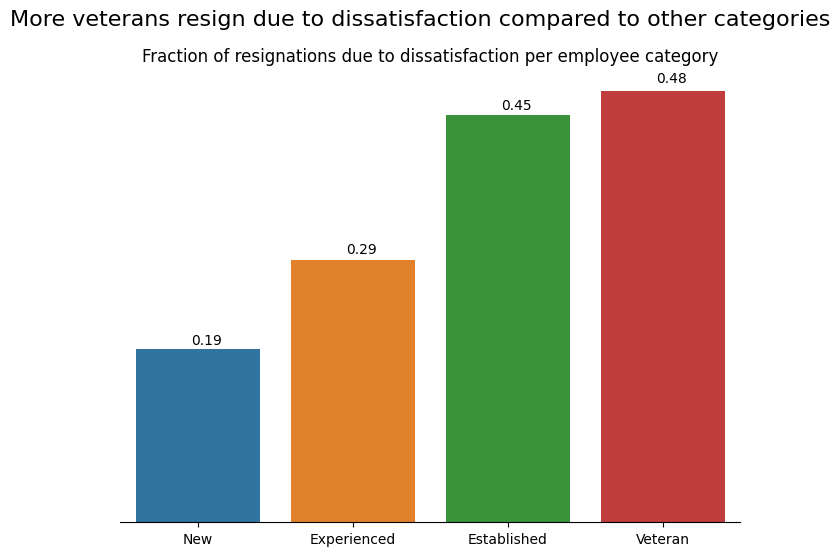

In [49]:
piv_service = pd.pivot_table(combined_updated, index="Service_cat", values="dissatisfied").reset_index()
piv_service_rounded = piv_service.iloc[[2,1,0,3]]['dissatisfied'].apply(lambda x: round(x, 2))

sns.barplot(data=piv_service,
            x="Service_cat",
            y="dissatisfied", 
            order=["New", "Experienced", "Established", "Veteran"],
           )
plt.title("Fraction of resignations due to dissatisfaction per employee category",  fontsize=12)
plt.suptitle("More veterans resign due to dissatisfaction compared to other categories", fontsize=16)

for i, value in enumerate(piv_service_rounded):
    plt.annotate(value, (i, value), textcoords="offset points", xytext=(-5, 5))
sns.despine(left=True, top=True, right=True)
plt.gcf().set_size_inches(8,6)
plt.gca().set_yticklabels([])
plt.gca().set_yticks([])
plt.ylabel("")
plt.xlabel("")

plt.show()

Almost half (48%) of the resignations of veterans of the institute is due to some kind of dissatisfaction compared to less than one fifth (19%) for new employees resignations.